<a href="https://colab.research.google.com/github/mahmud-nobe/Dataviz_Assignment/blob/master/NS111_Final_Project_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Volcanic Eruption Data

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/mahmud-nobe/631e178e17a34cd66c09b55b32305b8e/raw/a0e8b5ee4084adc4750c36db74531df08cba511b/data1.dat',
                   sep=' ', engine='python')
data

,Date,Lp-intensity,Uncertainty
0,UT,GW/micron/sr,GW/micron/sr
1,-------------------------,None,None
2,2001-12-18,14.8,2.2
3,2001-12-28,16.6,2.5
4,2001-12-20,4.3,0.6
...,...,...,...
138,2018-06-06,23.9,6.6
139,2018-06-15,42.8,18.2
140,2018-06-18,40.4,6.1
141,2018-06-22,36.7,19.4


In [3]:
data = data[2:]
data

,Date,Lp-intensity,Uncertainty
2,2001-12-18,14.8,2.2
3,2001-12-28,16.6,2.5
4,2001-12-20,4.3,0.6
5,2001-12-23,23.4,3.5
6,2001-12-28,28.8,4.3
...,...,...,...
138,2018-06-06,23.9,6.6
139,2018-06-15,42.8,18.2
140,2018-06-18,40.4,6.1
141,2018-06-22,36.7,19.4


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data['Lp-intensity'] = data['Lp-intensity'].astype(float)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Eccentricity Periodic Graph

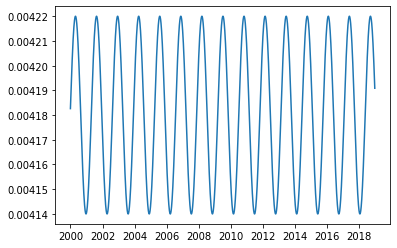

In [5]:
import math
import datetime

start = datetime.datetime(1999, 1, 1)

time = []
ecc = []

for t in range(365,7300):
    y = 0.00418 + 0.00004*math.cos(2*math.pi/480 * t)
    date = start + datetime.timedelta(days=t)
    
    time.append(date)
    ecc.append(y)

sns.lineplot(time,ecc)
plt.show()

In [6]:
ecc_data = pd.DataFrame()
ecc_data['Io eccentricity'] = ecc
ecc_data['Date'] = time
ecc_data

,Io eccentricity,Date
0,0.004183,2000-01-01
1,0.004183,2000-01-02
2,0.004184,2000-01-03
3,0.004184,2000-01-04
4,0.004185,2000-01-05
...,...,...
6930,0.004193,2018-12-22
6931,0.004192,2018-12-23
6932,0.004192,2018-12-24
6933,0.004191,2018-12-25


#### Final Combined Graph

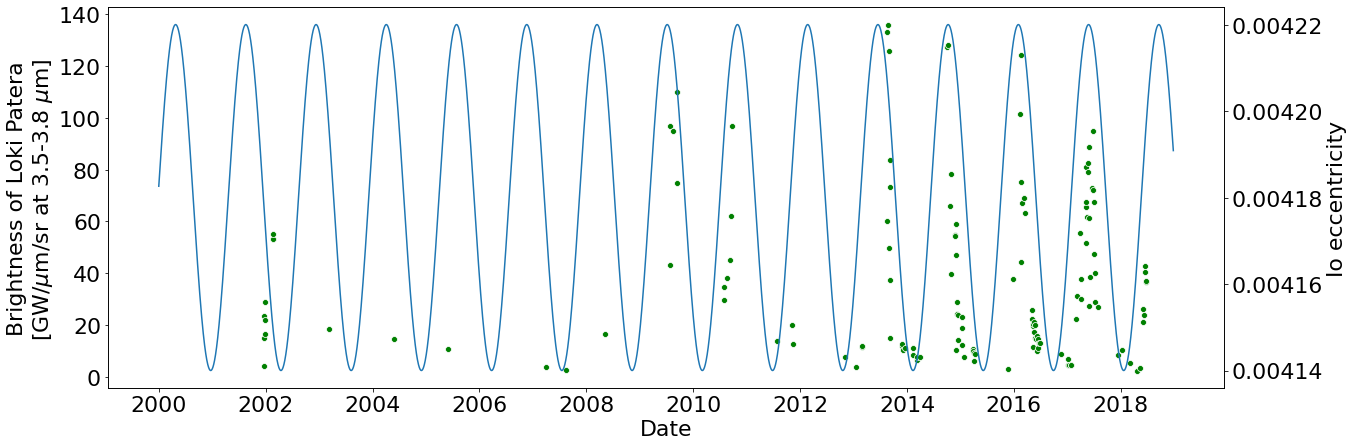

In [8]:
plt.rcParams.update({'font.size': 22})

fig, ax1 = plt.subplots(figsize=(20,7))

ax1 = sns.scatterplot(x = 'Date', y = 'Lp-intensity', data = data, color = 'green')
plt.ylabel('Brightness of Loki Patera\n[GW/$\mu$m/sr at 3.5-3.8 $\mu$m] ')
ax2 = ax1.twinx()

ax2 = sns.lineplot(x = 'Date', y = 'Io eccentricity', data = ecc_data)

plt.show()